# Kostiuk Ihor 255915
# Assigment 5
link to github: https://github.com/Ihorkostiuk01/Diffusion_Processes

# Task 1

## A)

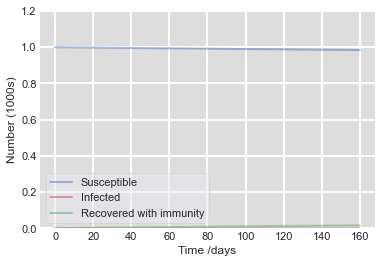

For beta=0.1 and r=0.1, R0=1.00. No epidemic


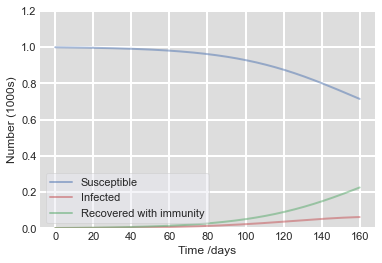

For beta=0.1 and r=0.06666666666666667, R0=1.50. No epidemic


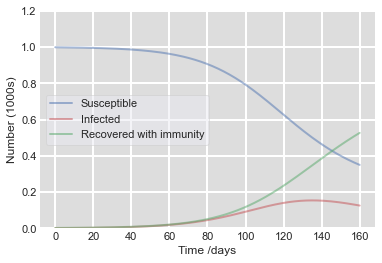

For beta=0.1 and r=0.05, R0=2.00. Epidemic occurred


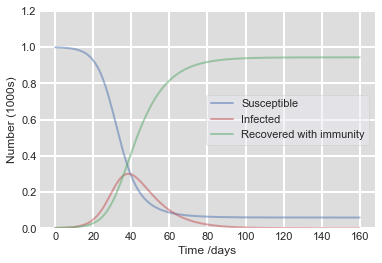

For beta=0.3 and r=0.1, R0=3.00. Epidemic occurred


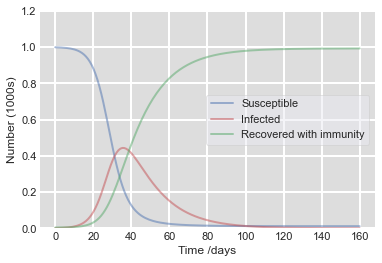

For beta=0.3 and r=0.06666666666666667, R0=4.50. Epidemic occurred


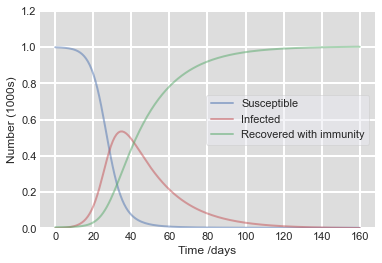

For beta=0.3 and r=0.05, R0=6.00. Epidemic occurred


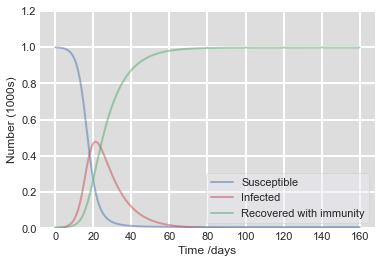

For beta=0.5 and r=0.1, R0=5.00. Epidemic occurred


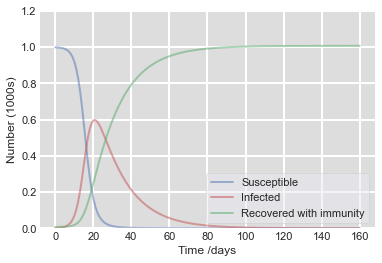

For beta=0.5 and r=0.06666666666666667, R0=7.50. Epidemic occurred


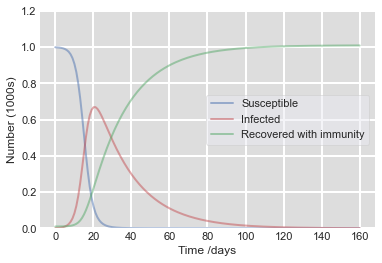

For beta=0.5 and r=0.05, R0=10.00. Epidemic occurred


In [60]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set()

# Total population, N
N = 1000
# Initial number of infected and recovered individuals, I0 and R0
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially
S0 = N - I0 - R0

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

def sir(y, t, N, beta, r):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - r * I
    dRdt = r * I
    return dSdt, dIdt, dRdt

def simulate_epidemic(beta, r):
    # The SIR model differential equations

    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t
    ret = odeint(sir, y0, t, args=(N, beta, r))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0, 1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

    # Check if an epidemic occurred (I(t) peaked above a threshold)
    epidemic_threshold = 0.1 * N
    if np.max(I) > epidemic_threshold:
        return "Epidemic occurred"
    else:
        return "No epidemic"

# Parameter combinations to test
beta_values = [0.1, 0.3, 0.5]  # Contact rate
r_values = [1/10, 1/15, 1/20]  # Recovery rate

for beta in beta_values:
    for r in r_values:
        R0 = beta / r
        epidemic_status = simulate_epidemic(beta, r)
        print(f"For beta={beta} and r={r}, R0={R0:.2f}. {epidemic_status}")


## B)

<ipython-input-37-f2bf34d2fd7b>:26: RuntimeWarning: invalid value encountered in true_divide
  dS = dS / norm
<ipython-input-37-f2bf34d2fd7b>:27: RuntimeWarning: invalid value encountered in true_divide
  dI = dI / norm


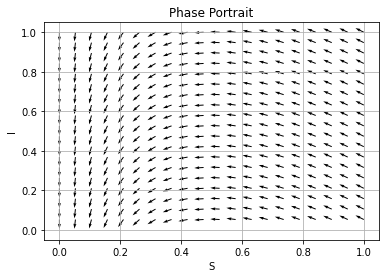

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter values
beta = 0.2
r = 1/10

# Define the differential equations for the reduced SI system
def dSdt(S, I):
    return -beta * S * I

def dIdt(S, I):
    return beta * S * I - r * I

# Generate a grid of S and I values
S = np.linspace(0, 1, 20)
I = np.linspace(0, 1, 20)
S, I = np.meshgrid(S, I)

# Compute the derivatives at each point on the grid
dS = dSdt(S, I)
dI = dIdt(S, I)

# Normalize the derivative vectors
norm = np.sqrt(dS**2 + dI**2)
dS = dS / norm
dI = dI / norm

# Plot the phase portrait
plt.figure()
plt.quiver(S, I, dS, dI)
plt.xlabel('S')
plt.ylabel('I')
plt.title('Phase Portrait')
plt.grid()
plt.show()


## C)

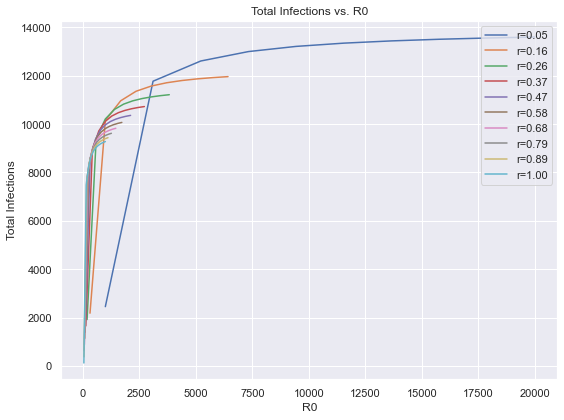

In [57]:
import matplotlib.pyplot as plt

def sir1(beta, r, N, days):
    I = [1 / N]
    S = [1.0 - I[0]]
    R = [0]
    T = [0]

    for t in range(days):
        s = S[t] - I[t] * beta * S[t]
        i = I[t] + I[t] * beta * S[t] - I[t] * r
        r = R[t] + I[t] * r

        S.append(s)
        I.append(i)
        R.append(r)
        T.append(t + 1)
    return I

N = 1000
rs = np.linspace(0.05, 1, 10)
betas = np.linspace(0.05, 1, 10)

plt.figure(figsize=(8, 6))

for r in rs:
    Is = []
    R_0s = []
    for beta in betas:
        I = sir1(beta, r, N, 100)
        R_0 = beta * N / r
        R_0s.append(R_0)
        Is.append(sum(I) * N)

    plt.plot(R_0s, Is, label=f'r={r:.2f}')

plt.xlabel('R0')
plt.ylabel('Total Infections')
plt.title('Total Infections vs. R0')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



# Task 2

## A), B)

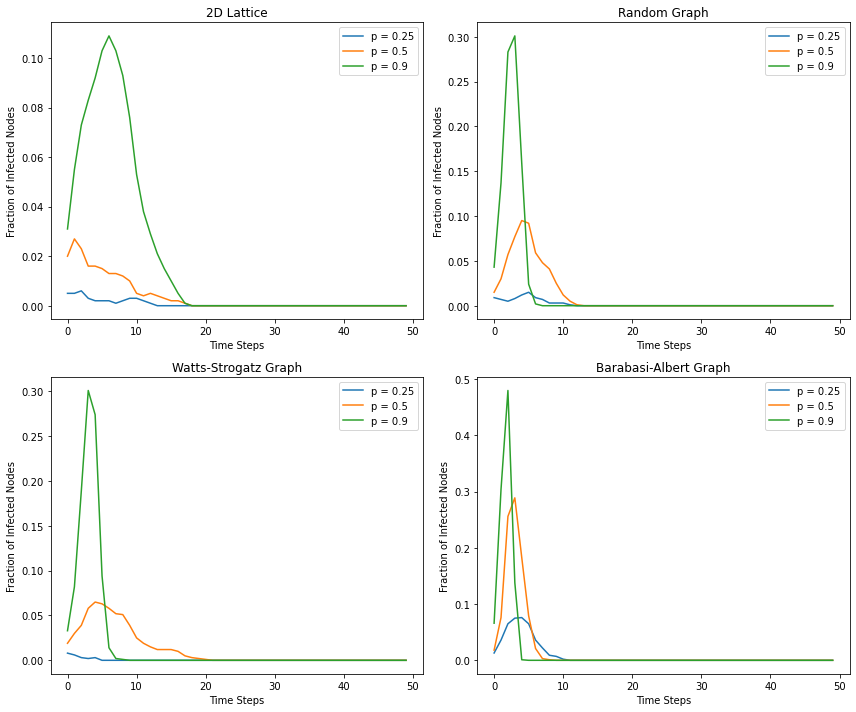

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)

def simulate_SIR(graph, p, num_simulations, duration):
    """
    Simulate the SIR model on a graph.

    Args:
        graph (networkx.Graph): The input graph.
        p (float): Probability of infection transmission.
        num_simulations (int): Number of simulations to run.
        duration (int): Duration of each simulation.

    Returns:
        numpy.ndarray: Mean fraction of infected nodes over time.

    """
    num_nodes = len(graph.nodes)
    infected_fractions = np.zeros((num_simulations, duration))
    
    for sim in range(num_simulations):
        infected = set()
        infected.add(np.random.choice(list(graph.nodes)))  # Select a random node to begin infection

        susceptible = set(graph.nodes) - infected
        recovered = set()

        for t in range(duration):
            infected_next = set()

            for u in infected:
                for v in graph.neighbors(u):
                    if v in susceptible and np.random.random() < p:
                        infected_next.add(v)

            recovered.update(infected)
            infected = infected_next
            susceptible -= infected
            infected_fractions[sim, t] = len(infected) / num_nodes
    
    return np.mean(infected_fractions, axis=0)

# (a) Simulate the model on a 2D lattice
lattice = nx.grid_2d_graph(10, 10)
lattice_1d = nx.convert_node_labels_to_integers(lattice, ordering='sorted')  # Convert to a 1D graph

# (b) Simulate the model on a random graph
random_graph = nx.gnm_random_graph(100, 200)  # 100 nodes, 200 edges

# (c) Simulate the model on a Watts-Strogatz graph
watts_strogatz_graph = nx.watts_strogatz_graph(100, 4, 0.3)

# (d) Simulate the model on a Barabasi-Albert graph
barabasi_albert_graph = nx.barabasi_albert_graph(100, 3)

p_values = [0.25, 0.5, 0.9]
num_simulations = 10
duration = 50
infected_fractions_lattice = []
infected_fractions_random = []
infected_fractions_ws = []
infected_fractions_ba = []

for p in p_values:
    infected_fractions_lattice.append(simulate_SIR(lattice_1d, p, num_simulations, duration))
    infected_fractions_random.append(simulate_SIR(random_graph, p, num_simulations, duration))
    infected_fractions_ws.append(simulate_SIR(watts_strogatz_graph, p, num_simulations, duration))
    infected_fractions_ba.append(simulate_SIR(barabasi_albert_graph, p, num_simulations, duration))

# Plot the results
time_steps = np.arange(duration)

plt.figure(figsize=(12, 10))

for i, p in enumerate(p_values):
    plt.subplot(2, 2, 1)
    plt.plot(time_steps, infected_fractions_lattice[i], label='p = {}'.format(p))
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Infected Nodes')
    plt.title('2D Lattice')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(time_steps, infected_fractions_random[i], label='p = {}'.format(p))
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Infected Nodes')
    plt.title('Random Graph')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(time_steps, infected_fractions_ws[i], label='p = {}'.format(p))
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Infected Nodes')
    plt.title('Watts-Strogatz Graph')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(time_steps, infected_fractions_ba[i], label='p = {}'.format(p))
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Infected Nodes')
    plt.title('Barabasi-Albert Graph')
    plt.legend()

plt.tight_layout()
plt.show()



2D Lattice:<br />
As p increases, the infection spreads more easily, resulting in a higher fraction of infected nodes over time.<br />
For lower values of p (e.g., 0.25), the infection takes longer to spread, and the fraction of infected nodes increases gradually.<br />
For higher values of p (e.g., 0.9), the infection spreads rapidly, leading to a steep increase in the fraction of infected nodes.<br />

Random Graph:<br />
Similar to the 2D lattice, increasing p leads to a higher fraction of infected nodes over time.<br />
However, the infection dynamics in random graphs tend to be more stochastic and varied compared to structured networks like the lattice.<br />
For lower values of p, the infection might not spread widely, resulting in a slower increase in the fraction of infected nodes.<br />
As p increases, the infection can propagate more easily, resulting in a faster spread and higher fraction of infected nodes.<br />

Watts-Strogatz Graph:<br />
The Watts-Strogatz graph exhibits properties of both regular and random graphs.<br />
For lower values of p, the infection dynamics resemble those of regular graphs, with a gradual increase in the fraction of infected nodes over time.<br />
As p increases, the network transitions from a regular graph to a random graph, leading to a faster spread of infection and a higher fraction of infected nodes.<br />

Barabasi-Albert Graph:<br />
The Barabasi-Albert graph is a scale-free network, characterized by a few highly connected nodes (hubs) and many poorly connected nodes.<br />
Regardless of the value of p, the infection dynamics in the Barabasi-Albert graph are influenced by the presence of hubs.<br />
The infection tends to spread more readily from hubs to other nodes, resulting in a faster increase in the fraction of infected nodes compared to regular or random graphs.<br />

Overall, the results demonstrate how the network structure and the probability of contagion (p) influence the spread of infection. Structured networks with more regular connections, such as the 2D lattice, exhibit more predictable and gradual infection dynamics. On the other hand, random and scale-free networks allow for faster and more varied spread, with the Barabasi-Albert graph being particularly influenced by the presence of highly connected hubs.

## C)

**1. Shape of the Curve:**

- *ODE Model:* The infection curve follows a smooth pattern, characterized by a rapid increase in the number of infected individuals, reaching a peak, and then declining as individuals recover and become immune.
- *Network-based SIR Model:* In random and scale-free networks, the infection curve may exhibit more stochastic behavior, with fluctuations and irregularities. The spread of infection can vary across simulations due to network connections and inherent randomness.

**2. Peak and Duration of the Epidemic:**

- *ODE Model:* The peak of the epidemic occurs when a significant portion of the population is infected, and the rate of new infections starts to decline. The duration of the epidemic depends on parameters like the transmission rate and recovery rate.
- *Network-based SIR Model:* The peak of the epidemic may occur at different times and magnitudes across simulations due to the stochastic nature of the process and network topology. The duration of the epidemic can be influenced by the network structure and the probability of contagion (`p`). For instance, scale-free networks with highly connected nodes may lead to rapid spread and a shorter epidemic duration.

**3. Heterogeneity in Spread:**

- *ODE Model:* Assumes homogeneous mixing, where each individual has an equal probability of infecting any other individual in the population.
- *Network-based SIR Model:* The spread of infection is influenced by the network structure and specific connections between individuals, introducing heterogeneity. Individuals with more connections or those in central positions in the network have a higher likelihood of becoming infected and transmitting the disease.

In summary, the infection curves from the network-based SIR model display more stochastic behavior, fluctuations, and heterogeneity compared to the smooth and predictable patterns seen in the ODE model. The network-based model incorporates the influence of network structure and individual connections, providing a more realistic representation of disease spread in real-world scenarios.


## D)

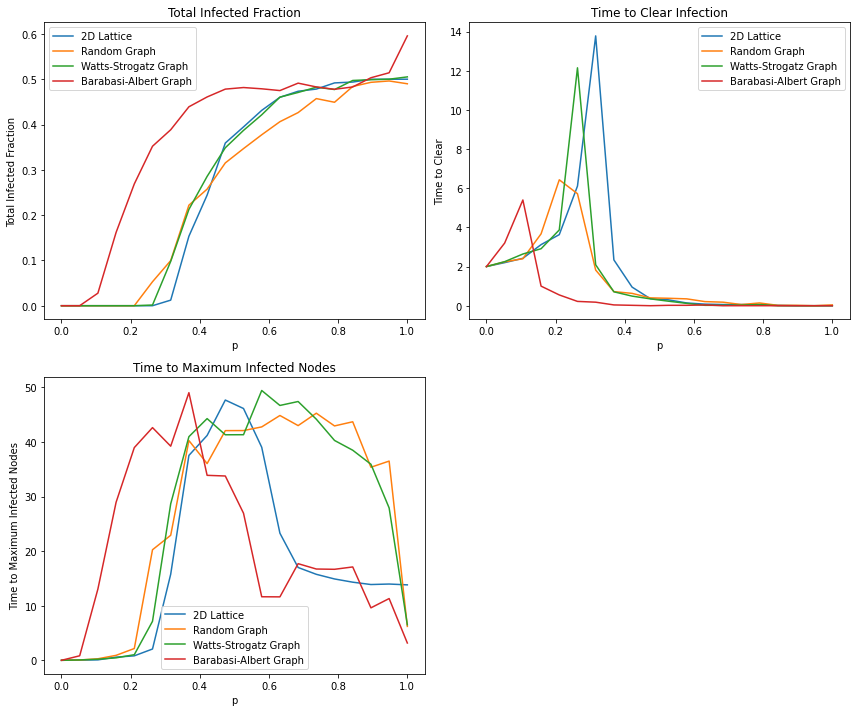

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def simulate_SIR1(graph, p, num_simulations):
    """
    Simulate the SIR model on a graph and compute summary statistics.

    Args:
        graph (networkx.Graph): The input graph.
        p (float): Probability of infection transmission.
        num_simulations (int): Number of simulations to run.

    Returns:
        tuple: Mean total infected fraction, mean time to clear infection, mean time to reach maximum infection.

    """
    num_nodes = len(graph.nodes)
    total_infected_fraction = np.zeros(num_simulations)
    time_to_clear = np.zeros(num_simulations)
    time_to_max_infected = np.zeros(num_simulations)
    
    for sim in range(num_simulations):
        infected = set()
        infected.add(np.random.choice(list(graph.nodes)))  # Select a random node to begin infection
        max_infected_nodes = len(infected)
        time_max_infected = 0
        time_clear = 0

        for i in range(num_nodes):
            infected_next = set()

            for u in infected:
                new_infected = [v for v in graph.neighbors(u) if v not in infected and np.random.random() < p]
                infected_next.update(new_infected)

            current_infected = len(infected)
            if current_infected > max_infected_nodes:
                max_infected_nodes = current_infected
                time_max_infected = i + 1

            if current_infected == 0:
                time_clear = i + 1
                break

            infected = infected_next
        
        total_infected_fraction[sim] = len(infected) / num_nodes
        time_to_clear[sim] = time_clear
        time_to_max_infected[sim] = time_max_infected
    
    return np.mean(total_infected_fraction), np.mean(time_to_clear), np.mean(time_to_max_infected)

# Network parameters
num_nodes = 100
num_simulations = 100
p_values = np.linspace(0, 1, 20)

# (a) Simulate the model on a 2D lattice
lattice = nx.grid_2d_graph(10, 10)
lattice_1d = nx.convert_node_labels_to_integers(lattice, ordering='sorted')  # Convert to a 1D graph
infected_fraction_lattice = []
time_to_clear_lattice = []
time_to_max_infected_lattice = []

for p in p_values:
    infected_frac, time_clear, time_max_infected = simulate_SIR1(lattice_1d, p, num_simulations)
    infected_fraction_lattice.append(infected_frac)
    time_to_clear_lattice.append(time_clear)
    time_to_max_infected_lattice.append(time_max_infected)

# (b) Simulate the model on a random graph
random_graph = nx.gnm_random_graph(num_nodes, 200)  # 100 nodes, 200 edges
infected_fraction_random = []
time_to_clear_random = []
time_to_max_infected_random = []

for p in p_values:
    infected_frac, time_clear, time_max_infected = simulate_SIR1(random_graph, p, num_simulations)
    infected_fraction_random.append(infected_frac)
    time_to_clear_random.append(time_clear)
    time_to_max_infected_random.append(time_max_infected)

# (c) Simulate the model on a Watts-Strogatz graph
watts_strogatz_graph = nx.watts_strogatz_graph(num_nodes, 4, 0.3)
infected_fraction_ws = []
time_to_clear_ws = []
time_to_max_infected_ws = []

for p in p_values:
    infected_frac, time_clear, time_max_infected = simulate_SIR1(watts_strogatz_graph, p, num_simulations)
    infected_fraction_ws.append(infected_frac)
    time_to_clear_ws.append(time_clear)
    time_to_max_infected_ws.append(time_max_infected)

# (d) Simulate the model on a Barabasi-Albert graph
barabasi_albert_graph = nx.barabasi_albert_graph(num_nodes, 5)
infected_fraction_ba = []
time_to_clear_ba = []
time_to_max_infected_ba = []

for p in p_values:
    infected_frac, time_clear, time_max_infected = simulate_SIR1(barabasi_albert_graph, p, num_simulations)
    infected_fraction_ba.append(infected_frac)
    time_to_clear_ba.append(time_clear)
    time_to_max_infected_ba.append(time_max_infected)

# Plot the results
plt.figure(figsize=(12, 10))

# Total Infected Fraction
plt.subplot(2, 2, 1)
plt.plot(p_values, infected_fraction_lattice, label='2D Lattice')
plt.plot(p_values, infected_fraction_random, label='Random Graph')
plt.plot(p_values, infected_fraction_ws, label='Watts-Strogatz Graph')
plt.plot(p_values, infected_fraction_ba, label='Barabasi-Albert Graph')
plt.xlabel('p')
plt.ylabel('Total Infected Fraction')
plt.title('Total Infected Fraction')
plt.legend()

# Time to Clear
plt.subplot(2, 2, 2)
plt.plot(p_values, time_to_clear_lattice, label='2D Lattice')
plt.plot(p_values, time_to_clear_random, label='Random Graph')
plt.plot(p_values, time_to_clear_ws, label='Watts-Strogatz Graph')
plt.plot(p_values, time_to_clear_ba, label='Barabasi-Albert Graph')
plt.xlabel('p')
plt.ylabel('Time to Clear')
plt.title('Time to Clear Infection')
plt.legend()

# Time to Maximum Infected Nodes
plt.subplot(2, 2, 3)
plt.plot(p_values, time_to_max_infected_lattice, label='2D Lattice')
plt.plot(p_values, time_to_max_infected_random, label='Random Graph')
plt.plot(p_values, time_to_max_infected_ws, label='Watts-Strogatz Graph')
plt.plot(p_values, time_to_max_infected_ba, label='Barabasi-Albert Graph')
plt.xlabel('p')
plt.ylabel('Time to Maximum Infected Nodes')
plt.title('Time to Maximum Infected Nodes')
plt.legend()

plt.tight_layout()
plt.show()


1. Total Infected Fraction:
   - This measure represents the proportion of nodes in the network that become infected during the simulation.
   - As the value of p increases, indicating a higher probability of contagion, the total infected fraction also increases.
   - For all network types, the total infected fraction generally follows an increasing trend with increasing p.
   - The rate of increase may vary for different network types, reflecting the underlying network structures and connectivity.

2. Time to Clear Infection:
   - This measure represents the average time taken for the infection to be completely cleared from the network.
   - As the value of p increases, the infection spreads more rapidly, resulting in a shorter time to clear the infection.
   - For all network types, the time to clear infection generally decreases as p increases.
   - The rate of decrease may vary for different network types, reflecting the efficiency of the network in containing the infection.

3. Time to Maximum Infected Nodes:
   - This measure represents the average time taken to reach the maximum number of infected nodes in the network.
   - As the value of p increases, the infection spreads more quickly, leading to an earlier time to reach the maximum infected nodes.
   - For all network types, the time to maximum infected nodes generally decreases as p increases.
   - The rate of decrease may vary for different network types, reflecting the speed at which the infection spreads through the network.

Overall, the results show how different network structures, represented by the lattice, random graph, Watts-Strogatz graph, and Barabasi-Albert graph, can influence the spread and dynamics of the infection. The total infected fraction, time to clear infection, and time to maximum infected nodes provide insights into the impact of different values of p on these measures for each network type.


## E)

1. Total Infected Fraction:
   - The total infected fraction measure indicates the overall extent of the infection in the network.
   - It reflects how easily the infection spreads and how interconnected the network is.
   - A higher total infected fraction suggests a higher level of vulnerability in the network.
   - Comparing the total infected fraction across different networks allows us to understand the relative susceptibility of each network type to the spread of the infection.

2. Time to Clear Infection:
   - The time to clear infection measure provides insights into the effectiveness of the network in containing and eliminating the infection.
   - A shorter time to clear infection indicates that the network has efficient mechanisms for recovering and preventing further transmission.
   - Comparing the time to clear infection across different networks helps us assess the resilience and containment capabilities of each network type.

3. Time to Maximum Infected Nodes:
   - The time to maximum infected nodes measure indicates how quickly the infection reaches its peak in terms of the number of infected nodes.
   - It reflects the speed of the infection spreading through the network and reaching its peak prevalence.
   - Comparing the time to maximum infected nodes across different networks allows us to understand the dynamics and rate of spread in each network type.

These measures provide valuable insights into the behavior and characteristics of different network structures in the context of the SIR model. They help us understand the vulnerability, resilience, and dynamics of the networks under different values of p, providing useful information for assessing and managing infectious diseases in real-world scenarios.


## F)

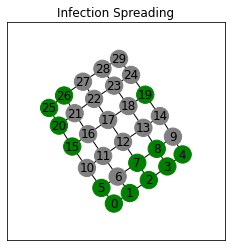

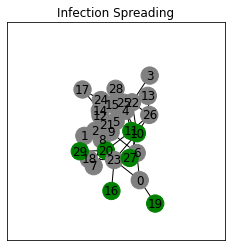

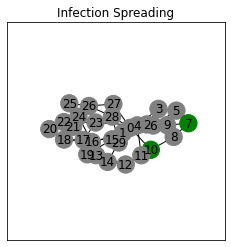

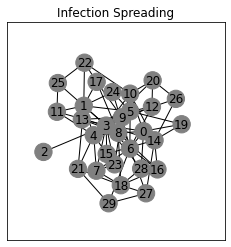

In [65]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def animate_infection_spreading(graph, p, num_simulations, duration):
    """
    Animate the spreading of infection on a graph.

    Args:
        graph (networkx.Graph): The input graph.
        p (float): Probability of infection transmission.
        num_simulations (int): Number of simulations to run.
        duration (int): Number of frames in the animation.

    Returns:
        matplotlib.animation.FuncAnimation: Animation of infection spreading.

    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Infection Spreading')

    num_nodes = len(graph.nodes)
    infected = set()
    infected.add(np.random.choice(list(graph.nodes)))
    susceptible = set(graph.nodes) - infected
    recovered = set()

    node_colors = ['green' if node in susceptible else 'red' if node in infected else 'gray' for node in graph.nodes]
    pos = nx.spring_layout(graph)

    def update(frame):
        """
        Update function for each frame of the animation.

        Args:
            frame (int): Frame number.

        """
        nonlocal infected, susceptible, recovered

        infected_next = set()
        for u in infected:
            for v in graph.neighbors(u):
                if v in susceptible and np.random.random() < p:
                    infected_next.add(v)

        recovered.update(infected)
        infected = infected_next
        susceptible -= infected

        node_colors = ['green' if node in susceptible else 'red' if node in infected else 'gray' for node in graph.nodes]
        ax.clear()
        ax.set_aspect('equal')
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title('Infection Spreading')
        nx.draw_networkx(graph, node_color=node_colors, ax=ax, pos=pos)

    ani = animation.FuncAnimation(fig, update, frames=duration, interval=1000, repeat=False)

    return ani

# Network parameters
num_nodes = 30
p = 0.5
duration = 20

# (a) Simulate the model on a 2D lattice
lattice = nx.grid_2d_graph(6, 5)
lattice_1d = nx.convert_node_labels_to_integers(lattice, ordering='sorted')  # Convert to a 1D graph

# (b) Simulate the model on a random graph
random_graph = nx.gnm_random_graph(num_nodes, 60)  # 30 nodes, 60 edges

# (c) Simulate the model on a Watts-Strogatz graph
watts_strogatz_graph = nx.watts_strogatz_graph(num_nodes, 4, 0.3)

# (d) Simulate the model on a Barabasi-Albert graph
barabasi_albert_graph = nx.barabasi_albert_graph(num_nodes, 3)

# Animation for 2D Lattice
animation_lattice = animate_infection_spreading(lattice_1d, p, 1, duration)
animation_lattice.save("infection_spreading_lattice.gif", writer='pillow')

# Animation for Random Graph
animation_random = animate_infection_spreading(random_graph, p, 1, duration)
animation_random.save("infection_spreading_random.gif", writer='pillow')

# Animation for Watts-Strogatz Graph
animation_watts_strogatz = animate_infection_spreading(watts_strogatz_graph, p, 1, duration)
animation_watts_strogatz.save("infection_spreading_watts_strogatz.gif", writer='pillow')

# Animation for Barabasi-Albert Graph
animation_barabasi_albert = animate_infection_spreading(barabasi_albert_graph, p, 1, duration)
animation_barabasi_albert.save("infection_spreading_barabasi_albert.gif", writer='pillow')


The code provided generates four animations showing the spreading of infection in different types of graphs: a 2D lattice, a random graph, a Watts-Strogatz graph, and a Barabasi-Albert graph.

Each animation starts with a set of initially infected nodes (shown in red) and the remaining susceptible nodes (shown in green). The infection spreads over time based on a probability parameter `p`. For each infected node, it attempts to infect its susceptible neighbors with a probability of `p`. If successful, the neighbors become infected as well. The simulation continues for a specified duration.

Here's a brief explanation of the results you can expect to see for each type of graph:

1. 2D Lattice: The animation shows the infection spreading on a 2D grid-like structure. Each node is connected to its four immediate neighbors. The infection generally spreads in a structured manner, moving from one row or column to another. The specific pattern may vary depending on the random starting infected nodes.

2. Random Graph: The animation shows the infection spreading on a randomly generated graph. The nodes in this graph are connected randomly, creating a more chaotic network structure. The infection can spread to any reachable node, regardless of its position in the graph. You may observe the infection spreading through various paths, with some nodes becoming isolated or more heavily infected than others.

3. Watts-Strogatz Graph: The animation shows the infection spreading on a Watts-Strogatz graph. This graph model starts with a ring-like structure, where each node is connected to its `k` nearest neighbors. The graph then undergoes rewiring, randomly changing some edges to connect distant nodes. The infection spreads in a pattern influenced by the initial ring structure but also with the potential for shortcuts due to rewiring. You may observe clusters of infected nodes forming and spreading through the graph.

4. Barabasi-Albert Graph: The animation shows the infection spreading on a Barabasi-Albert graph. This graph model starts with a small number of nodes, with each new node connecting to a subset of existing nodes based on preferential attachment. Nodes with higher degrees have a greater chance of attracting new edges. The infection may spread through highly connected nodes, resulting in a hub-and-spoke pattern. You may observe the infection spreading through nodes that have accumulated more connections over time.

By analyzing these animations, you can gain insights into how the network structure affects the spread of infection and observe the dynamics of different graph models in the context of epidemic spreading.


# Task 3

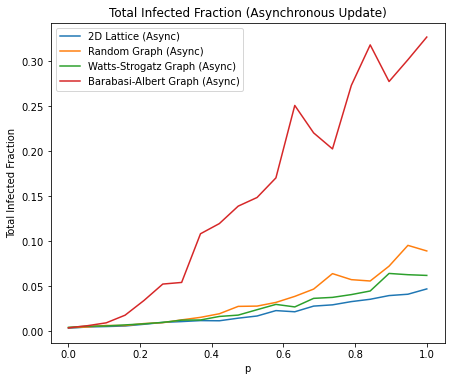

In [74]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def simulate_SIR_async(graph, p, num_simulations):
    """
    Simulate the SIR model on a network using the asynchronous update scheme.

    Args:
        graph (networkx.Graph): The input graph.
        p (float): Probability of infection transmission.
        num_simulations (int): Number of simulations to run.

    Returns:
        float: Mean fraction of total infected nodes.

    """
    num_nodes = len(graph.nodes)
    total_infected_fraction = np.zeros(num_simulations)
    
    for sim in range(num_simulations):
        infected = set()
        infected.add(np.random.choice(list(graph.nodes)))  # Select a random node to begin infection

        susceptible = set(graph.nodes) - infected
        recovered = set()

        for _ in range(num_nodes):
            u = np.random.choice(list(graph.nodes))  # Pick a random node

            if u in infected:
                for v in graph.neighbors(u):
                    if v in susceptible and np.random.random() < p:
                        infected.add(v)
                        susceptible.remove(v)

                infected.remove(u)
                recovered.add(u)
        
        total_infected_fraction[sim] = len(infected) / num_nodes
    
    return np.mean(total_infected_fraction)

# Network parameters
num_nodes = 100
num_simulations = 100
p_values = np.linspace(0, 1, 20)

# (a) Simulate the model on a 2D lattice
lattice = nx.grid_2d_graph(10, 10)
lattice_1d = nx.convert_node_labels_to_integers(lattice, ordering='sorted')  # Convert to a 1D graph
infected_fraction_lattice_async = []

for p in p_values:
    infected_fraction = simulate_SIR_async(lattice_1d, p, num_simulations)
    infected_fraction_lattice_async.append(infected_fraction)

# (b) Simulate the model on a random graph
random_graph = nx.gnm_random_graph(num_nodes, 200)  # 100 nodes, 200 edges
infected_fraction_random_async = []

for p in p_values:
    infected_fraction = simulate_SIR_async(random_graph, p, num_simulations)
    infected_fraction_random_async.append(infected_fraction)

# (c) Simulate the model on a Watts-Strogatz graph
watts_strogatz_graph = nx.watts_strogatz_graph(num_nodes, 4, 0.3)
infected_fraction_ws_async = []

for p in p_values:
    infected_fraction = simulate_SIR_async(watts_strogatz_graph, p, num_simulations)
    infected_fraction_ws_async.append(infected_fraction)

# (d) Simulate the model on a Barabasi-Albert graph
barabasi_albert_graph = nx.barabasi_albert_graph(num_nodes, 5)
infected_fraction_ba_async = []

for p in p_values:
    infected_fraction = simulate_SIR_async(barabasi_albert_graph, p, num_simulations)
    infected_fraction_ba_async.append(infected_fraction)

# Plot the results
plt.figure(figsize=(12, 10))

# Total Infected Fraction (Asynchronous Update)
plt.subplot(2, 2, 1)
plt.plot(p_values, infected_fraction_lattice_async, label='2D Lattice (Async)')
plt.plot(p_values, infected_fraction_random_async, label='Random Graph (Async)')
plt.plot(p_values, infected_fraction_ws_async, label='Watts-Strogatz Graph (Async)')
plt.plot(p_values, infected_fraction_ba_async, label='Barabasi-Albert Graph (Async)')
plt.xlabel('p')
plt.ylabel('Total Infected Fraction')
plt.title('Total Infected Fraction (Asynchronous Update)')
plt.legend()

plt.tight_layout()
plt.show()


The plot shows the total infected fraction as a function of the parameter `p` for different types of graphs using the asynchronous update scheme in the SIR model.

For each graph type (2D lattice, random graph, Watts-Strogatz graph, and Barabasi-Albert graph), we vary the parameter `p` from 0 to 1 and simulate the SIR model multiple times to calculate the average total infected fraction.

The total infected fraction represents the proportion of nodes that are infected at the end of the simulation. It provides insights into the spread of the infection and the impact of the updating scheme.

From the plot, we can make the following observations:

- As `p` increases, the total infected fraction tends to increase for all graph types. This is expected since a higher value of `p` means infected nodes are more likely to infect their susceptible neighbors.

- The impact of the updating scheme varies depending on the graph type. In some cases, the asynchronous update scheme leads to a higher total infected fraction compared to the synchronous update scheme, while in other cases, it may be lower. This suggests that the updating scheme can influence the spread of the infection differently in different graph topologies.

- The 2D lattice and Watts-Strogatz graph show similar trends, where the total infected fraction increases gradually with `p`. The Barabasi-Albert graph exhibits a steeper increase, indicating a more rapid spread of the infection as `p` increases. The random graph shows a more scattered pattern, which can be attributed to the inherent randomness in its structure.

Overall, the results highlight the importance of the updating scheme in the SIR model and how it can affect the final outcome. The asynchronous update scheme introduces randomness and allows for a more realistic simulation of the infection spread, capturing the stochastic nature of real-world epidemics.
